In [1]:
#-----------------------------------------------------
#TODO 绘制所有基因中各个随机因素中的解释率
#-----------------------------------------------------
Variant_decomp=read.table("./Gene_expression_decomposition.txt",header=T)
geneId=seq(0,dim(Variant_decomp)[1]-1)/dim(Variant_decomp)[1]

#!按照解释率的高低进行排序
timerOrder=order(Variant_decomp[,6],decreasing = T)
sampleOrder=order(Variant_decomp[,3],decreasing = T)

timeVariant=Variant_decomp[timerOrder,]
timeVariant$order=geneId

sampleVariant=Variant_decomp[sampleOrder,]
sampleVariant$order=geneId


In [2]:
head(Variant_decomp)

,GeneId,sample_low,sample_mean,sample_high,time_low,time_mean,time_high
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Ghir_A01G013020,0.02995630,0.03817412,0.04583249,0.8375165,0.8491891,0.8600454
2,Ghir_A01G013010,0.02609173,0.03303096,0.04094966,0.8148013,0.8279988,0.8412865
3,Ghir_A01G012740,0.08588830,0.11298466,0.14249688,0.2380449,0.2669705,0.2952226
4,Ghir_A01G012800,0.06224891,0.08681997,0.11322001,0.4202668,0.4535930,0.4874444
5,Ghir_A01G012920,0.06816381,0.08920724,0.11260068,0.7676688,0.7943273,0.8206792
6,Ghir_A01G012820,0.04088486,0.05768222,0.07702772,0.5796929,0.6104844,0.6411704


png 
  2

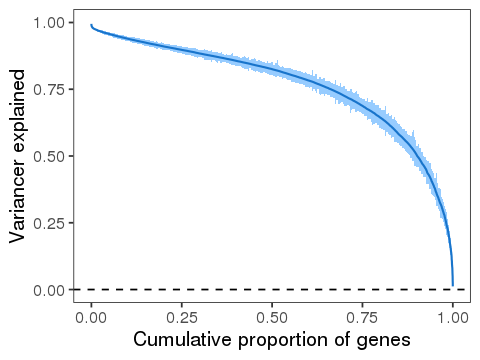

In [3]:
#* time 
library(ggplot2)
options(repr.plot.width = 4, repr.plot.height = 3) # 调整画布大小
p=ggplot(timeVariant, aes(x = order)) +
  geom_ribbon(aes(ymin = time_low, ymax = time_high), fill = "#97ccff") +
  geom_line(aes(y = time_mean), size = 0.6,color='#1874cb') +
  theme_bw() +
  theme(
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=12),
  ) +
  geom_hline(yintercept = 0, color = "black", linetype = "dashed") +
  scale_y_continuous(limits = c(0, 1))+
  # scale_x_continuous(labels = c('0 DPA','4 DPA' ,'8 DPA' ,'12 DPA','16 DPA','20 DPA'))+
  ylab("Variancer explained") +
  xlab("Cumulative proportion of genes")
png("time_scale_expressionVariant.png",res = 600,width = 2000,height = 2000)
print(p)
dev.off()
p

png 
  2

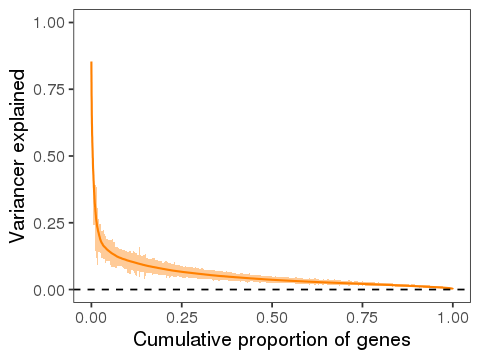

In [4]:
#* sample
library(ggplot2)
options(repr.plot.width = 4, repr.plot.height = 3) # 调整画布大小
p=ggplot(sampleVariant, aes(x = order)) +
  geom_ribbon(aes(ymin = sample_low, ymax = sample_high), fill = "#ffcb98") +
  geom_line(aes(y = sample_mean), size = 0.6, color = "#ff8000") +
  theme_bw() +
  theme(
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size = 10),
    axis.title = element_text(size = 12),
  ) +
  geom_hline(yintercept = 0, color = "black", linetype = "dashed") +
  scale_y_continuous(limits = c(0, 1)) +
  # scale_x_continuous(labels = c('0 DPA','4 DPA' ,'8 DPA' ,'12 DPA','16 DPA','20 DPA'))+
  ylab("Variancer explained") +
  xlab("Cumulative proportion of genes")
png("individual_scale_expressionVariant.png",res = 600,width = 2000,height = 2000)
print(p)
dev.off()  
p

In [1]:
library("lme4")
data(package = "lme4")
data('sleepstudy')
mod1a = lmer(Reaction ~ Days + (1 | Subject), data=sleepstudy)
# head(sleepstudy)
# summary(mod1a)


Loading required package: Matrix



Data sets in package ‘lme4’:

Arabidopsis             Arabidopsis clipping/fertilization data
Dyestuff                Yield of dyestuff by batch
Dyestuff2               Yield of dyestuff by batch
InstEval                University Lecture/Instructor Evaluations by
                        Students at ETH
Pastes                  Paste strength by batch and cask
Penicillin              Variation in penicillin testing
VerbAgg                 Verbal Aggression item responses
cake                    Breakage Angle of Chocolate Cakes
cbpp                    Contagious bovine pleuropneumonia
grouseticks             Data on red grouse ticks from Elston et al.
                        2001
grouseticks_agg (grouseticks)
                        Data on red grouse ticks from Elston et al.
                        2001
sleepstudy              Reaction times in a sleep deprivation study

In [1]:
library("lme4")
readMatrix=read.table("test_data.txt",header=T)
# readMatrix$sampleId=as.factor(readMatrix$sampleId)
# readMatrix$timepoint =as.factor(readMatrix$time)
#*------------------------------
#* Variance decomposition 
#*------------------------------
model=lmer('FPKM ~ 1 + (1 | time) +(1|sampleId)', data = readMatrix)   
timeVariant=as.data.frame(summary(model)$varcor)[1,4]
sampleVariant=as.data.frame(summary(model)$varcor)[2,4]
residualVariant=as.data.frame(summary(model)$varcor)[3,4]
result <- c(timeVariant,sampleVariant,residualVariant)


Loading required package: Matrix



In [62]:
model0=lmer('FPKM ~ 1+ (1 | sampleId)+(1+time)', data = readMatrix)
model1=lmer('FPKM ~ time + (1 | sampleId)', data = readMatrix)

In [67]:
sum(as.data.frame(summary(model)$varcor)$vcov)

[1] 0.05879358

In [2]:
summary(model)

Linear mixed model fit by REML ['lmerMod']
Formula: FPKM ~ 1 + (1 | time) + (1 | sampleId)
   Data: readMatrix

REML criterion at convergence: -230.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.2832 -0.5528  0.0239  0.6399  2.6573 

Random effects:
 Groups   Name        Variance Std.Dev.
 sampleId (Intercept) 0.003436 0.05862 
 time     (Intercept) 0.006189 0.07867 
 Residual             0.049168 0.22174 
Number of obs: 2215, groups:  sampleId, 376; time, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)   3.6706     0.0326   112.6